In [10]:
!pip install newspaper3k
!pip install GoogleNews
!pip install nltk
!pip install wordcloud

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arungupta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 5)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10

[nltk_data] Downloading package punkt to /Users/arungupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
selected_stock = 'SBIN.NS'
if selected_stock != '':
    print(f'Searching for and analyzing {selected_stock}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(selected_stock)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df[['media','title']])

Searching for and analyzing SBIN.NS, Please be patient, it might take a while...
                media                                              title
0       Bhaskar Hindi  स्टेट बैंक की महिलाकर्मियों को लेकर प्रियंका च...
1      Business Today  Following criticism, SBI withdraws guidelines ...
2  The Economic Times  एसबीआई ने गर्भवती महिलाओं की भर्ती संबंधी सर्क...
3           Hindustan  गर्भवती महिलाओं के भर्ती नियम पर बढ़ा विवाद, S...
4  The Economic Times  SBI suspends circular on recruitment of pregna...
5   Business Standard  SBI keeps revised recruitment rules for pregna...
6        Moneycontrol  SBI withdraws controversial circular on pregna...
7         Bollyinside  Tatas chooses SBI and two other banks to finan...
8      Niharika Times  दिल्ली महिला आयोग ने एसबीआई बैंक की गाइडलाइंस ...
9        Moneycontrol  SBI says pregnant women over 3 months unfit to...


In [14]:
try:
    list =[] #creating an empty list
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
            article.download() #downloading the article
            article.parse() #parsing the article
            article.nlp() #performing natural language processing (nlp)
        except:
            pass
            #storing results in our empty dictionary
        dict['Date']=df['date'][i]
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
        news_df=pd.DataFrame(list) #creating dataframe
        print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )

          Date               Media  \
0   1 hour ago       Bhaskar Hindi   
1   1 hour ago      Business Today   
2   1 hour ago  The Economic Times   
3   1 hour ago           Hindustan   
4  2 hours ago  The Economic Times   
5  2 hours ago   Business Standard   
6  2 hours ago        Moneycontrol   
7  3 hours ago         Bollyinside   
8  3 hours ago      Niharika Times   
9  4 hours ago        Moneycontrol   

                                               Title  \
0  स्टेट बैंक की महिलाकर्मियों को लेकर प्रियंका च...   
1  Following criticism, SBI withdraws guidelines ...   
2  एसबीआई ने गर्भवती महिलाओं की भर्ती संबंधी सर्क...   
3  गर्भवती महिलाओं के भर्ती नियम पर बढ़ा विवाद, S...   
4  SBI suspends circular on recruitment of pregna...   
5  SBI keeps revised recruitment rules for pregna...   
6  SBI withdraws controversial circular on pregna...   
7  Tatas chooses SBI and two other banks to finan...   
8  दिल्ली महिला आयोग ने एसबीआई बैंक की गाइडलाइंस ...   
9  SBI says pregnant 

Positive Sentiment: 4.00
Neutral Sentiment: 3.00
Negative Sentiment: 3.00


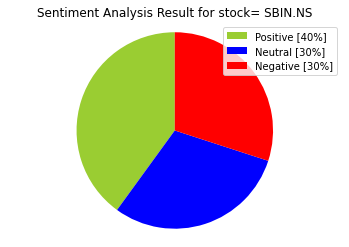

Wordcloud for SBIN.NS


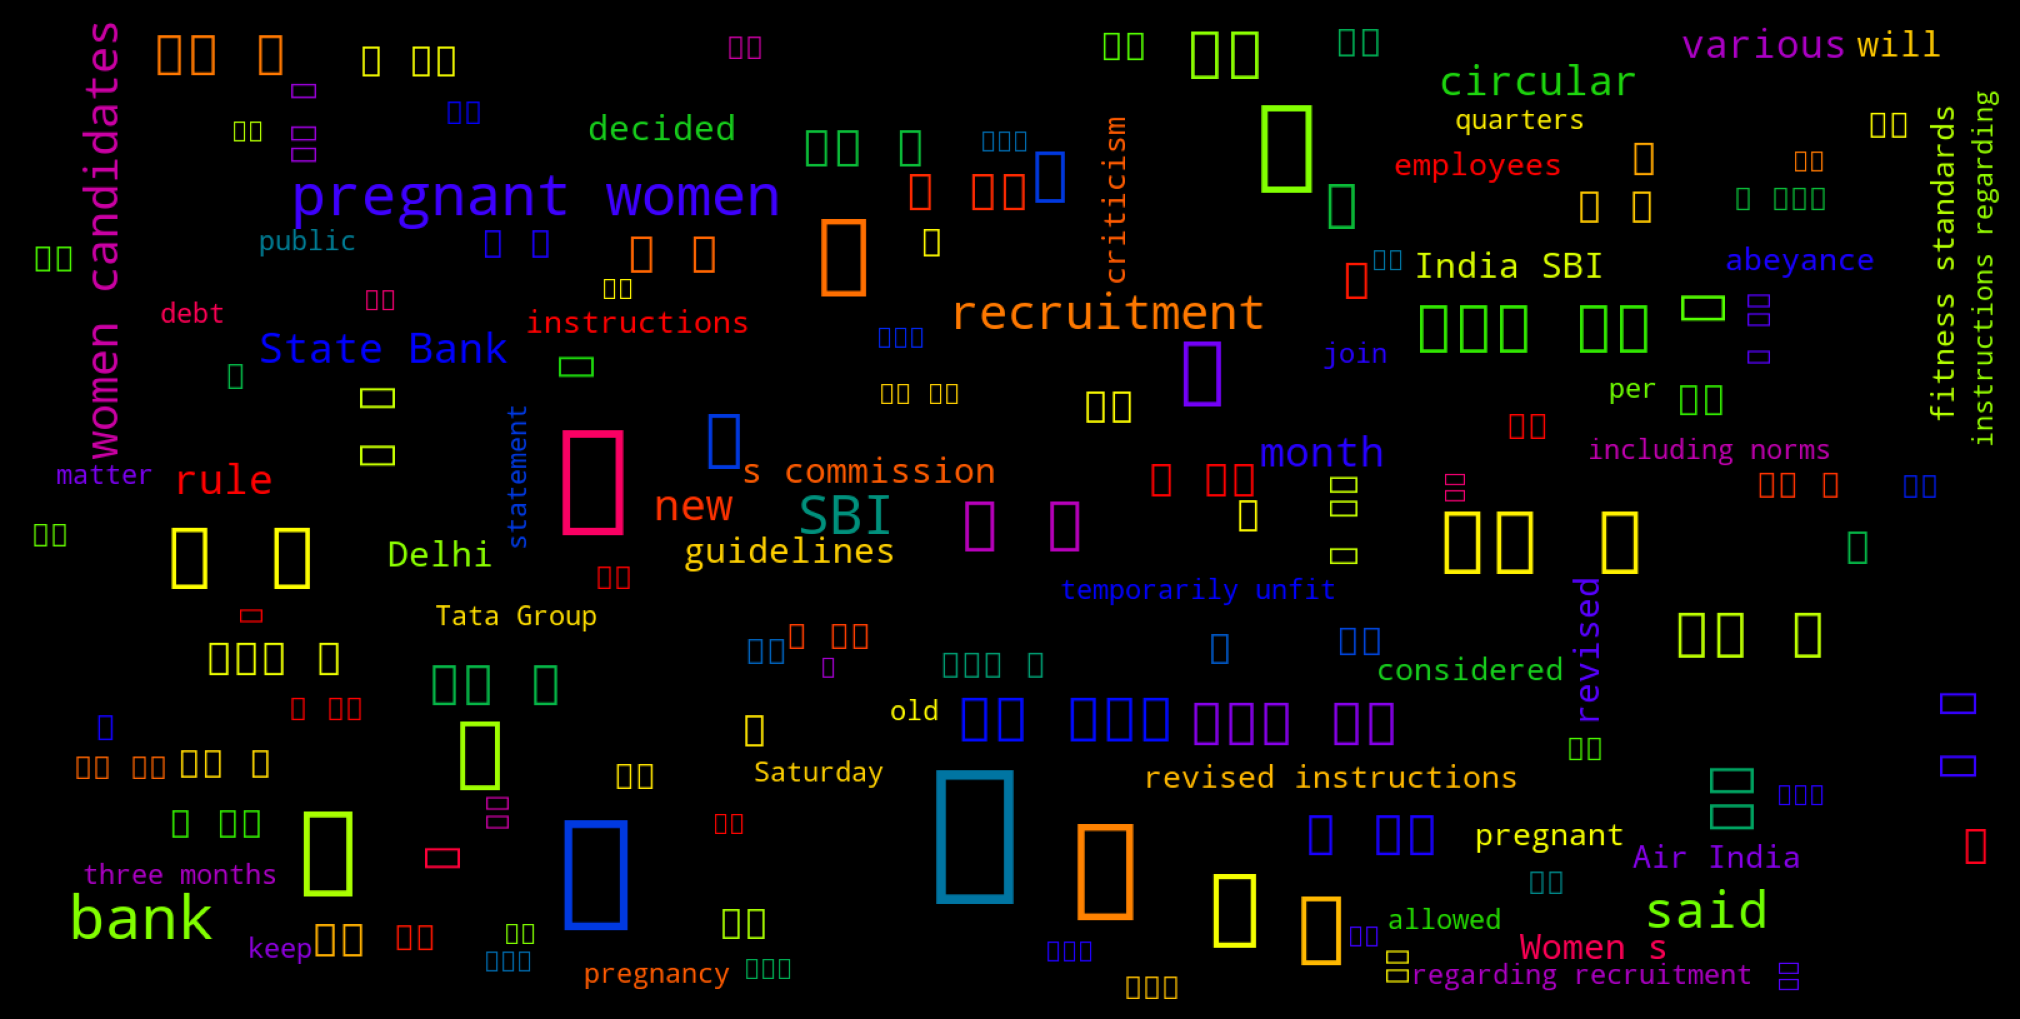

In [15]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+selected_stock+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + selected_stock)
word_cloud(news_df['Summary'].values)